In [1]:
import pandas as pd

files = ['input.csv', 'output.csv', 'loan_data.csv']
for fn in files:
    path = f'../data/{fn}'     # note the ../ to go up one directory
    df = pd.read_csv(path)
    print(f"{fn}: {df.shape}")
    display(df.head())





input.csv: (9577, 18)


,1,0.1189,829.1,11.35040654,19.48,737,5639.958333,28854,52.1,0,0.1,0.2,0.3,0.4,1.1,0.5,0.6,0.7
0,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0
1,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0
2,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0
3,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0
4,1,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0,1,0,0,0,0


output.csv: (9577, 2)


,0,1
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


loan_data.csv: (9578, 14)


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [2]:
# 1. Inspect structure & missingness
df = pd.read_csv('../data/loan_data.csv')
df.info()

# 2. Quick summary stats
df.describe()

# 3. Examine the target balance
print(df['not.fully.paid'].value_counts(normalize=True))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB
not.fully.paid
0    0.839946
1    0.160054
Name: proportion, dt

In [3]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


In [4]:
df['purpose'].value_counts()

purpose
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: count, dtype: int64

In [ ]:
# these unique values for purpose all have a good amount in them so no need to group and I will just need to one-hot encode them


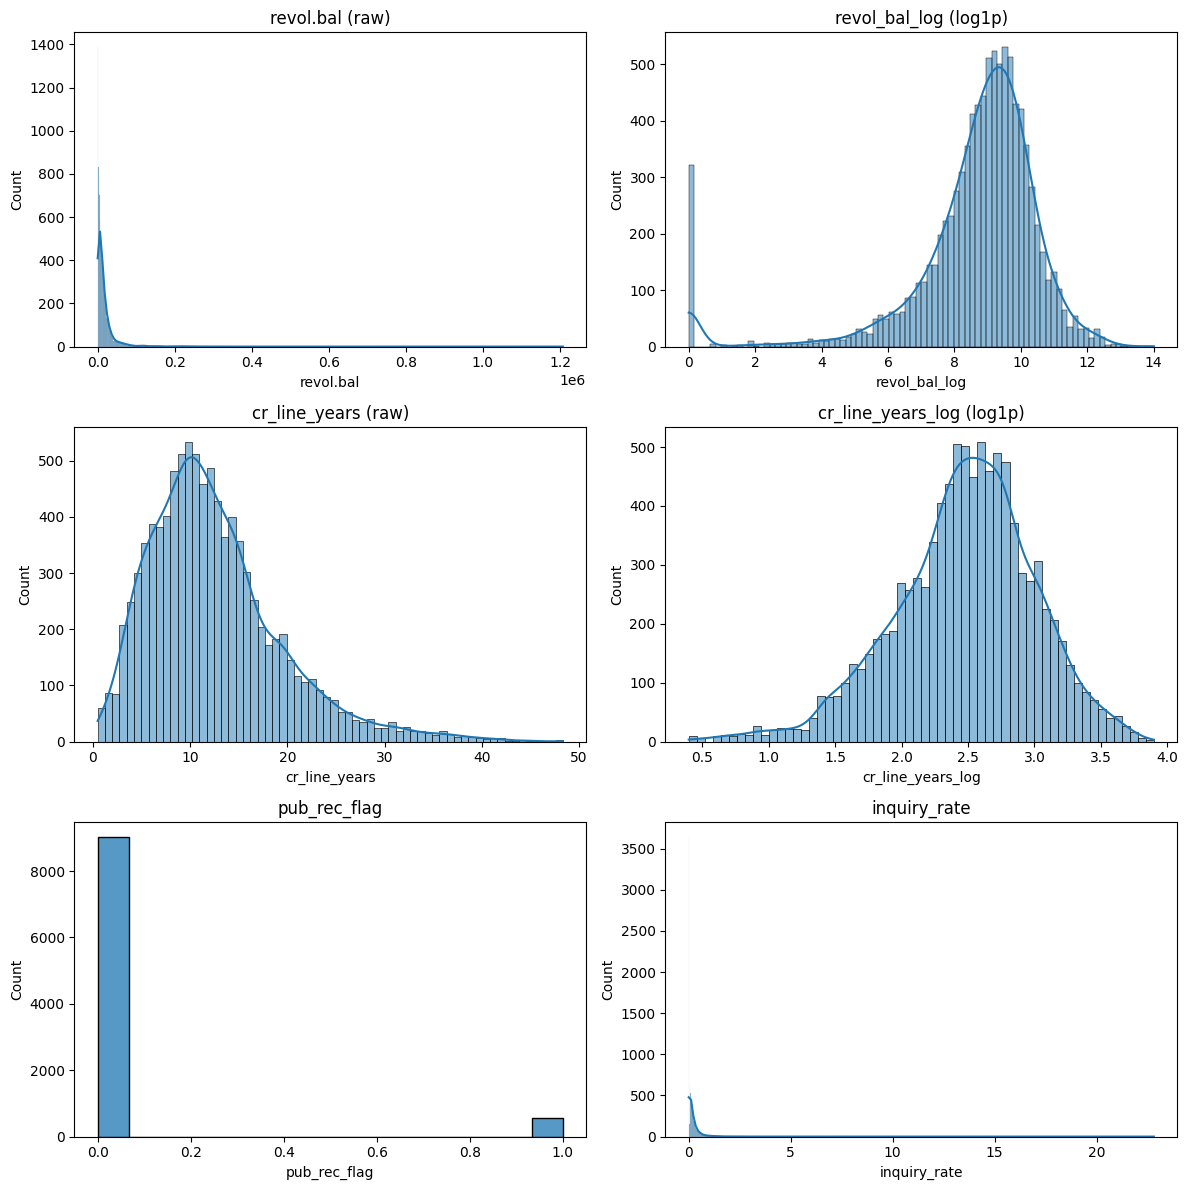

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create engineered columns
df['revol_bal_log']     = np.log1p(df['revol.bal'])
df['cr_line_years']     = df['days.with.cr.line'] / 365
df['cr_line_years_log'] = np.log1p(df['cr_line_years'])
df['pub_rec_flag']      = (df['pub.rec'] > 0).astype(int)
df['inquiry_rate']      = df['inq.last.6mths'] / df['cr_line_years']

# 2. Plot distributions before/after and of new features
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Raw vs log revol.bal
sns.histplot(df['revol.bal'], ax=axes[0,0], kde=True)
axes[0,0].set_title('revol.bal (raw)')
sns.histplot(df['revol_bal_log'], ax=axes[0,1], kde=True)
axes[0,1].set_title('revol_bal_log (log1p)')

# Raw vs log credit-line years
sns.histplot(df['cr_line_years'], ax=axes[1,0], kde=True)
axes[1,0].set_title('cr_line_years (raw)')
sns.histplot(df['cr_line_years_log'], ax=axes[1,1], kde=True)
axes[1,1].set_title('cr_line_years_log (log1p)')

# New engineered features
sns.histplot(df['pub_rec_flag'], ax=axes[2,0], kde=False)
axes[2,0].set_title('pub_rec_flag')
sns.histplot(df['inquiry_rate'], ax=axes[2,1], kde=True)
axes[2,1].set_title('inquiry_rate')

plt.tight_layout()
plt.show()



In [8]:
print("Raw revol.bal skew:", df['revol.bal'].skew())
print("Log revol.bal skew:", df['revol_bal_log'].skew())
print("Raw cr_line_years skew:", df['cr_line_years'].skew())
print("Log cr_line_years skew:", df['cr_line_years_log'].skew())
# huge positive skews (>1) dropped to small negative values (near symmetric)

Raw revol.bal skew: 11.161058494625456
Log revol.bal skew: -2.213951128118913
Raw cr_line_years skew: 1.1557482270969544
Log cr_line_years skew: -0.48603726603876085


In [9]:
from sklearn.preprocessing import StandardScaler

# List the numeric columns to scale
num_cols = [
    'revol_bal_log',
    'cr_line_years_log',
    'int.rate',
    'installment',
    'log.annual.inc',
    'dti',
    'fico',
    'revol.util',
    'inq.last.6mths',
    'delinq.2yrs',
    'pub.rec',
    'inquiry_rate'
]

# Initialize scaler and fit_transform on the entire df for now
# (In practice, we'll do train/test split first—but for EDA/demo we can scale everything)
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Quick sanity check: all means ~0, stds ~1
df[num_cols].describe().loc[['mean','std']].T



,mean,std
revol_bal_log,3.827940e-16,1.000052
cr_line_years_log,7.774575e-16,1.000052
int.rate,-4.747832e-17,1.000052
installment,-4.896202e-17,1.000052
log.annual.inc,1.348681e-15,1.000052
dti,-7.121748e-17,1.000052
fico,2.848699e-16,1.000052
revol.util,4.154353e-17,1.000052
inq.last.6mths,2.373916e-17,1.000052
delinq.2yrs,1.186958e-17,1.000052


In [10]:
# One-hot encode purpose, drop the first category to avoid multicollinearity
df = pd.get_dummies(df, columns=['purpose'], drop_first=True)

# Check new columns
[p for p in df.columns if p.startswith('purpose_')]


['purpose_credit_card',
 'purpose_debt_consolidation',
 'purpose_educational',
 'purpose_home_improvement',
 'purpose_major_purchase',
 'purpose_small_business']

In [11]:
# save a csv of the transformed and clean data ready for the model
df.to_csv('../data/loan_data_ready.csv', index=False)